Nous essayons de présenter le réseau de la SNCF afin de nous donner une vue d'ensemble.

Nous nous focialiserons sur :
* les diférentes stations de la SNCF en **Ile-de-France** (cartographie);
* la fréquentation des différentes stations (surtout les plus fréquentées et les moins fréquentées).

## Gares de voyageurs de la SNCF

### Récupération des données sur les gares de la SNCF

Nous utilisons l'API fourni par la plateforme open data de la SNCF pour récupérer l'ensemble des données sur les gares de voyageurs de la SNCF en France (`referentiel-gares-voyageurs`).

Nous les importons sous format **json**.

In [55]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests as rq
import pandas as pd

In [56]:
url_gares = "https://ressources.data.sncf.com/api/v2/catalog/datasets/referentiel-gares-voyageurs/exports" + "/json" + "?limit=-1"+ "&offset=0" + "&lang=fr" + "&timezone=Europe%2FParis"
dataGares = rq.get(url_gares)
dataGares = dataGares.json() 
dataGares = pd.json_normalize(dataGares)

In [57]:
dataGares.to_csv("D:/Documents/ENSAE-PARIS/2AD/Python-DataScience/Projet_Python_SNCF/gares_voyageurs.csv")

`Exécutons le code suivant pour l'affichage complet de toutes les requêtes de nos cellules`

In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

`Exécutons le code suivant pour filtrer les warnings`

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
dataGares.shape
dataGares.head()
dataGares.tail()

(3213, 31)

,code,code_gare,uic_code,dtfinval,alias_libelle_noncontraint,adresse_cp,commune_code,commune_libellemin,departement_numero,departement_libellemin,...,gare_etrangere_on,gare_agencegc_libelle,gare_regionsncf_libelle,gare_ug_libelle,gare_ut_libelle,gare_nbpltf,tvs,wgs_84.lon,wgs_84.lat,wgs_84
0,00001-1,00001,0087988717,None,Lycée Henri Sellier,93190,046,Livry-Gargan,93,Seine-Saint-Denis,...,False,DGIF,REGION DE PARIS-EST,None,LIVRY GARGAN GARE LYCEE HENRI SELLIER TR,1,LHS,2.515040,48.916460,NaN
1,00007-1,00007,0087784876,None,Bourg-Madame,66760,025,Bourg-Madame,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,BOURG MADAME GARE,1,BMD,1.948670,42.432407,NaN
2,00013-1,00013,0087784819,None,Font-Romeu-Odeillo-Via,66120,124,Font-Romeu-Odeillo-Via,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,FONT ROMEU ODEILLO VIA GARE,1,FRM,2.038392,42.491232,NaN
3,00019-1,00019,0087784751,None,Thuès Carença,66360,209,Thuès-Entre-Valls,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,None,1,THG,2.222728,42.522949,NaN
4,00025-1,00025,0087784686,None,Villefranche - Vernet-les-Bains,66820,223,Villefranche-de-Conflent,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,VILLEFRANCHE VERNET LES BAINS GARE,1,VVB,2.370396,42.591998,NaN


,code,code_gare,uic_code,dtfinval,alias_libelle_noncontraint,adresse_cp,commune_code,commune_libellemin,departement_numero,departement_libellemin,...,gare_etrangere_on,gare_agencegc_libelle,gare_regionsncf_libelle,gare_ug_libelle,gare_ut_libelle,gare_nbpltf,tvs,wgs_84.lon,wgs_84.lat,wgs_84
3208,03210-1,03210,0087722249,None,Irigny Yvours,69540,100,Irigny,69,Rhône,...,False,DRG AURA-BFC,None,UG Lyon Vallée du Rhône,IRIGNY GARE,1,IRY,4.832290,45.690020,NaN
3209,03212-1,03212,0087697318,None,Villetaneuse Université T11,93430,079,Villetaneuse,93,Seine-Saint-Denis,...,False,DGIF,None,None,EPINAY VILLETANEUSE GARE,1,None,2.342510,48.960000,NaN
3210,03213-1,03213,0087697334,None,Stains la Cerisaie,93240,072,Stains,93,Seine-Saint-Denis,...,False,DGIF,None,None,STAINS CERISAIE GARE TLN,1,None,2.392090,48.954800,NaN
3211,03219-1,03219,0087688887,None,Montpellier Sud de France,34000,172,Montpellier,34,Hérault,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,MONTPELLIER SUD DE FRANCE TGV,1,MSF,3.924623,43.594787,NaN
3212,03290-1,03290,0087725473,None,Boulazac,24750,None,None,None,None,...,False,DRG Nlle Aquitaine,None,UG Aquitaine,ULIS BOULAZAC PN 055,1,None,NaN,NaN,NaN


In [61]:
dataGares.columns

Index(['code', 'code_gare', 'uic_code', 'dtfinval',
       'alias_libelle_noncontraint', 'adresse_cp', 'commune_code',
       'commune_libellemin', 'departement_numero', 'departement_libellemin',
       'longitude_entreeprincipale_wgs84', 'latitude_entreeprincipale_wgs84',
       'segmentdrg_libelle', 'niveauservice_libelle', 'rg_libelle', 'tvss',
       'sops', 'gare', 'gare_alias_libelle_noncontraint',
       'gare_alias_libelle_fronton', 'gare_drg_on', 'gare_etrangere_on',
       'gare_agencegc_libelle', 'gare_regionsncf_libelle', 'gare_ug_libelle',
       'gare_ut_libelle', 'gare_nbpltf', 'tvs', 'wgs_84.lon', 'wgs_84.lat',
       'wgs_84'],
      dtype='object')

Il faut ensuite les mettre au format DataFrame compatible avec *geopandas* pour les manipulations. Ici, les coordonnées spaiales (**longitude** et **latitude**) de chaque station sont mises dans deux différentes columns. Nous les regroupons sous la variable **geometry** et on coserve à cette étape le système de projection **WGS84**.

In [62]:
dataGares = gpd.GeoDataFrame(dataGares, geometry = gpd.points_from_xy(dataGares["wgs_84.lon"], dataGares["wgs_84.lat"]), crs= 4326)

In [63]:
dataGares = dataGares.drop(columns={"wgs_84"})

In [64]:
dataGares.shape
dataGares.head()
dataGares.tail()

(3213, 31)

,code,code_gare,uic_code,dtfinval,alias_libelle_noncontraint,adresse_cp,commune_code,commune_libellemin,departement_numero,departement_libellemin,...,gare_etrangere_on,gare_agencegc_libelle,gare_regionsncf_libelle,gare_ug_libelle,gare_ut_libelle,gare_nbpltf,tvs,wgs_84.lon,wgs_84.lat,geometry
0,00001-1,00001,0087988717,None,Lycée Henri Sellier,93190,046,Livry-Gargan,93,Seine-Saint-Denis,...,False,DGIF,REGION DE PARIS-EST,None,LIVRY GARGAN GARE LYCEE HENRI SELLIER TR,1,LHS,2.515040,48.916460,POINT (2.51504 48.91646)
1,00007-1,00007,0087784876,None,Bourg-Madame,66760,025,Bourg-Madame,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,BOURG MADAME GARE,1,BMD,1.948670,42.432407,POINT (1.94867 42.43241)
2,00013-1,00013,0087784819,None,Font-Romeu-Odeillo-Via,66120,124,Font-Romeu-Odeillo-Via,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,FONT ROMEU ODEILLO VIA GARE,1,FRM,2.038392,42.491232,POINT (2.03839 42.49123)
3,00019-1,00019,0087784751,None,Thuès Carença,66360,209,Thuès-Entre-Valls,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,None,1,THG,2.222728,42.522949,POINT (2.22273 42.52295)
4,00025-1,00025,0087784686,None,Villefranche - Vernet-les-Bains,66820,223,Villefranche-de-Conflent,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,VILLEFRANCHE VERNET LES BAINS GARE,1,VVB,2.370396,42.591998,POINT (2.37040 42.59200)


,code,code_gare,uic_code,dtfinval,alias_libelle_noncontraint,adresse_cp,commune_code,commune_libellemin,departement_numero,departement_libellemin,...,gare_etrangere_on,gare_agencegc_libelle,gare_regionsncf_libelle,gare_ug_libelle,gare_ut_libelle,gare_nbpltf,tvs,wgs_84.lon,wgs_84.lat,geometry
3208,03210-1,03210,0087722249,None,Irigny Yvours,69540,100,Irigny,69,Rhône,...,False,DRG AURA-BFC,None,UG Lyon Vallée du Rhône,IRIGNY GARE,1,IRY,4.832290,45.690020,POINT (4.83229 45.69002)
3209,03212-1,03212,0087697318,None,Villetaneuse Université T11,93430,079,Villetaneuse,93,Seine-Saint-Denis,...,False,DGIF,None,None,EPINAY VILLETANEUSE GARE,1,None,2.342510,48.960000,POINT (2.34251 48.96000)
3210,03213-1,03213,0087697334,None,Stains la Cerisaie,93240,072,Stains,93,Seine-Saint-Denis,...,False,DGIF,None,None,STAINS CERISAIE GARE TLN,1,None,2.392090,48.954800,POINT (2.39209 48.95480)
3211,03219-1,03219,0087688887,None,Montpellier Sud de France,34000,172,Montpellier,34,Hérault,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,MONTPELLIER SUD DE FRANCE TGV,1,MSF,3.924623,43.594787,POINT (3.92462 43.59479)
3212,03290-1,03290,0087725473,None,Boulazac,24750,None,None,None,None,...,False,DRG Nlle Aquitaine,None,UG Aquitaine,ULIS BOULAZAC PN 055,1,None,NaN,NaN,POINT EMPTY


In [65]:
len(dataGares.columns)
dataGares.columns

31

Index(['code', 'code_gare', 'uic_code', 'dtfinval',
       'alias_libelle_noncontraint', 'adresse_cp', 'commune_code',
       'commune_libellemin', 'departement_numero', 'departement_libellemin',
       'longitude_entreeprincipale_wgs84', 'latitude_entreeprincipale_wgs84',
       'segmentdrg_libelle', 'niveauservice_libelle', 'rg_libelle', 'tvss',
       'sops', 'gare', 'gare_alias_libelle_noncontraint',
       'gare_alias_libelle_fronton', 'gare_drg_on', 'gare_etrangere_on',
       'gare_agencegc_libelle', 'gare_regionsncf_libelle', 'gare_ug_libelle',
       'gare_ut_libelle', 'gare_nbpltf', 'tvs', 'wgs_84.lon', 'wgs_84.lat',
       'geometry'],
      dtype='object')

Le jeu de données compte désormais 29 variables décrivant chaque gare voyageur. 

Globalement dans notre travail, on s'intéressera aux variables suivantes : 
* **code_gare** : identifiant unique de chaque gare ;
* **dtfinval** : La date de fin de validité de la plateforme ;
* **adresse_cp** : Le code INSEE de a commune de localisation de la gare ;
* **alias_libelle_noncontraint** : le nom de la gare ;
* **departement_numero** : code INSEE du département de localisation de la gare ;
* **gare_etrangere_on** : prend `True` si la gre est située à l'étranger et `False` sinon ;
* **geometry** : coordonnées spatiales de la gare .

In [66]:
dataGares.shape
dataGares[dataGares["gare_etrangere_on"] == "False"]["adresse_cp"].shape #nombre de communes françaises

(3213, 31)

(3213,)

Au total, 3211 gares de voyageurs sont répertoriées dans ce jeu de données et toutes sont situées sur le territoire français.

On garde uniquement les gares dont la plateforme est toujours valide et la variables d'intérêt sus-citées.

Mais avant remplaçons les `None` présents dans le jeu de données par `NaN`.

In [67]:
dataGares.fillna(value= np.nan, inplace=True)

In [68]:
dataGares["dtfinval"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3208    NaN
3209    NaN
3210    NaN
3211    NaN
3212    NaN
Name: dtfinval, Length: 3213, dtype: object

In [69]:
dataGares = dataGares[dataGares["dtfinval"].isnull()] # retrait des gares ayant une date de fin de validité
dataGaresV = dataGares[["code_gare", "dtfinval", "adresse_cp", "alias_libelle_noncontraint", "departement_numero", "gare_etrangere_on","wgs_84.lon", "wgs_84.lat", "geometry"]]
dataGaresV.shape

(2885, 9)

Il nous reste à présent **2885** gares de voyageurs encore valides.

Il n'existe aucune variable dans `dataGareV` précisant la région administrative française dans laquelle se situe la gare. `rg_libelle` dans le jeu `dataGare`  représentait plutôt la région SNCF concernée.

Pour cela, nous allons importer à partir de l'`API` de `data.gouv`, le jeu de données `regions` qui associe à chque département sa région et la fusionner avec le jeu `dataGare`.

In [70]:
url_regions = "https://geo.api.gouv.fr/departements?fields=nom,region,zone"
regions = rq.get(url_regions)
regions = pd.json_normalize(regions.json())
regions.head()
regions.tail()
regions.shape

,nom,zone,code,region.code,region.nom
0,Ain,metro,01,84,Auvergne-Rhône-Alpes
1,Aisne,metro,02,32,Hauts-de-France
2,Allier,metro,03,84,Auvergne-Rhône-Alpes
3,Alpes-de-Haute-Provence,metro,04,93,Provence-Alpes-Côte d'Azur
4,Hautes-Alpes,metro,05,93,Provence-Alpes-Côte d'Azur


,nom,zone,code,region.code,region.nom
96,Guadeloupe,drom,971,01,Guadeloupe
97,Martinique,drom,972,02,Martinique
98,Guyane,drom,973,03,Guyane
99,La Réunion,drom,974,04,La Réunion
100,Mayotte,drom,976,06,Mayotte


(101, 5)

In [71]:
regions.rename(columns={"code" : "departement_numero"}, inplace=True)

In [72]:
dataGaresV = dataGaresV.merge(regions, how = "left")

In [73]:
dataGaresV.shape
dataGaresV.head()
dataGaresV.tail()

(2885, 13)

,code_gare,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,wgs_84.lon,wgs_84.lat,geometry,nom,zone,region.code,region.nom
0,00001,NaN,93190,Lycée Henri Sellier,93,False,2.515040,48.916460,POINT (2.51504 48.91646),Seine-Saint-Denis,metro,11,Île-de-France
1,00007,NaN,66760,Bourg-Madame,66,False,1.948670,42.432407,POINT (1.94867 42.43241),Pyrénées-Orientales,metro,76,Occitanie
2,00013,NaN,66120,Font-Romeu-Odeillo-Via,66,False,2.038392,42.491232,POINT (2.03839 42.49123),Pyrénées-Orientales,metro,76,Occitanie
3,00019,NaN,66360,Thuès Carença,66,False,2.222728,42.522949,POINT (2.22273 42.52295),Pyrénées-Orientales,metro,76,Occitanie
4,00025,NaN,66820,Villefranche - Vernet-les-Bains,66,False,2.370396,42.591998,POINT (2.37040 42.59200),Pyrénées-Orientales,metro,76,Occitanie


,code_gare,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,wgs_84.lon,wgs_84.lat,geometry,nom,zone,region.code,region.nom
2880,03210,NaN,69540,Irigny Yvours,69,False,4.832290,45.690020,POINT (4.83229 45.69002),Rhône,metro,84,Auvergne-Rhône-Alpes
2881,03212,NaN,93430,Villetaneuse Université T11,93,False,2.342510,48.960000,POINT (2.34251 48.96000),Seine-Saint-Denis,metro,11,Île-de-France
2882,03213,NaN,93240,Stains la Cerisaie,93,False,2.392090,48.954800,POINT (2.39209 48.95480),Seine-Saint-Denis,metro,11,Île-de-France
2883,03219,NaN,34000,Montpellier Sud de France,34,False,3.924623,43.594787,POINT (3.92462 43.59479),Hérault,metro,76,Occitanie
2884,03290,NaN,24750,Boulazac,NaN,False,NaN,NaN,POINT EMPTY,NaN,NaN,NaN,NaN


### Examen des données et enrichissement de la base

In [74]:
dataGaresV["region.nom"].describe()

count              2878
unique               12
top       Île-de-France
freq                406
Name: region.nom, dtype: object

On remarque que 12 régions sont présentes dans nos données. Nous soupçonnons la Corse comme région manquante

In [75]:
regions["region.nom"].describe()

count           101
unique           18
top       Occitanie
freq             13
Name: region.nom, dtype: object

In [76]:
dataGaresV["region.nom"].unique()

array(['Île-de-France', 'Occitanie', "Provence-Alpes-Côte d'Azur",
       'Auvergne-Rhône-Alpes', nan, 'Bourgogne-Franche-Comté',
       'Nouvelle-Aquitaine', 'Centre-Val de Loire', 'Pays de la Loire',
       'Bretagne', 'Normandie', 'Hauts-de-France', 'Grand Est'],
      dtype=object)

Les dix-huit régions métropolitaines et d'Outre-Mer sont bien présentes dans le jeu `regions`. Il est donc clair que les données manquantes proviennent du jeu `dataGares` (notamment au niveau de la clé de jointure `numero_departement` que nous avions utilisé) . Pour nous en convaincre,

In [77]:
dataGares["code_gare"][dataGares["departement_numero"].isnull()]

53      00323
75      00407
290     01540
1280    03220
1640    01911
3021    02296
3212    03290
Name: code_gare, dtype: object

In [78]:
dataGaresV["code_gare"][dataGaresV["departement_numero"].isnull()]

51      00323
73      00407
274     01540
1167    03220
1505    01911
2729    02296
2884    03290
Name: code_gare, dtype: object

Nous récupérons donc les codes des communes et procédons au cas par cas pour remplir leur région.

In [79]:
dataGaresV["adresse_cp"][dataGaresV["region.nom"].isnull()]

51      38730
73      73220
274     85340
1167    72000
1505    72130
2729    80500
2884    24750
Name: adresse_cp, dtype: object

In [80]:
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "38730"), "Auvergne-Rhône-Alpes", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "73220"), "Auvergne-Rhône-Alpes", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "85340"), "Pays de la Loire", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "72130"), "Pays de la Loire", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "80500"), "Hauts-de-France", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "24750"), "Nouvelle-Aquitaine", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "72000"), "Pays de la Loire", inplace = True)

Nous vérifions que les remplacement ont bien abouti

In [81]:
dataGaresV[["adresse_cp", "region.nom"]][dataGaresV["region.code"].isnull()]

,adresse_cp,region.nom
51,38730,Auvergne-Rhône-Alpes
73,73220,Auvergne-Rhône-Alpes
274,85340,Pays de la Loire
1167,72000,Pays de la Loire
1505,72130,Pays de la Loire
2729,80500,Hauts-de-France
2884,24750,Nouvelle-Aquitaine


### Répartition des gares dans les régions métropolitaines hors **Corse**

In [82]:
dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False)
dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False).mean()
dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False).std()

region.nom
Île-de-France                 406
Grand Est                     353
Hauts-de-France               338
Auvergne-Rhône-Alpes          328
Nouvelle-Aquitaine            318
Occitanie                     266
Bourgogne-Franche-Comté       198
Centre-Val de Loire           159
Provence-Alpes-Côte d'Azur    149
Pays de la Loire              137
Bretagne                      124
Normandie                     109
Name: code_gare, dtype: int64

240.41666666666666

105.42680212384613

Il ressort que l'Ile-de-France est la région qui régorge le plus de gares avec **404** et la Normandie,, celle qui en regorge le moins avec **109**. Cela représente en moyenne, environ de **240** par région pour un écart-type d'environ 105 gares. Les gares sont donc très inégalement réparties dans les différentes régions.

Les graphique suivants permettent de mieux visualiser cette répartition

In [83]:
plt.style.use('seaborn')

In [84]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

Text(0, 0.5, '')

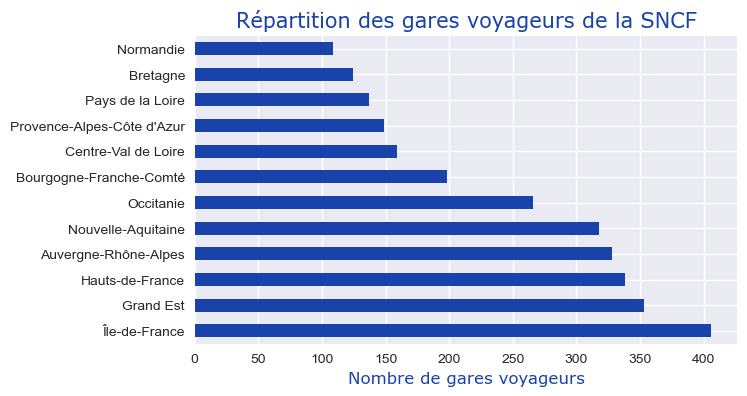

In [85]:
plt.figure(figsize=(7, 4))
dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False).plot(kind = "barh", color = "#1943AA")
plt.title("Répartition des gares voyageurs de la SNCF",color =  "#1943AA", fontfamily = "verdana", fontsize = 15)
plt.xlabel("Nombre de gares voyageurs", fontsize = 12, color = "#1943AA", fontfamily = "verdana")
plt.ylabel("")

On récupère le fonds de carte avec limites des communes (à partir de `cartiflette`) puis :
* on représente un `choropleth` des régions suivant le nombre de gares voyageurs qu'elle abrite ;
* on réalise une carte interractive de localisation des différentes gares par région.

Installons `cartiflette`

In [86]:
'''!pip install --upgrade botocore==1.23.26 
!pip install --upgrade urllib3==1.22.0 
!pip install py7zr 
!pip install s3fs
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .'''

'!pip install --upgrade botocore==1.23.26 \n!pip install --upgrade urllib3==1.22.0 \n!pip install py7zr \n!pip install s3fs\n!git clone https://github.com/InseeFrLab/cartogether.git\n%cd ./cartogether\n!pip install -r requirements.txt\n!pip install .'

Installation d'autres extensions nécessaires

In [87]:
#!pip install fiona shapely pyproj rtree 
#!pip install contextily
#!pip install pygeos

In [88]:
import cartiflette

In [89]:
from cartiflette.download import get_vectorfile_ign
france = get_vectorfile_ign(
  level = "REGION",
  field = "metropole",
  source = "COG",
  provider="opendatarchives"
  )

http://files.opendatarchives.fr/professionnels.ign.fr/adminexpress/ADMIN-EXPRESS-COG_3-1__SHP__FRA_L93_2022-04-15.7z
Data have been previously downloaded and are still available in C:\Users\guysa\AppData\Local\Temp/COG-2022


In [90]:
france.head()

,ID,NOM_M,NOM,INSEE_REG,geometry
0,REGION_FXX_0000000000001,ILE-DE-FRANCE,Île-de-France,11,"POLYGON ((689486.400 6885591.700, 689488.900 6..."
1,REGION_FXX_0000000000002,CENTRE-VAL DE LOIRE,Centre-Val de Loire,24,"POLYGON ((604790.400 6831645.800, 604797.700 6..."
2,REGION_FXX_0000000000003,BOURGOGNE-FRANCHE-COMTE,Bourgogne-Franche-Comté,27,"POLYGON ((880572.700 6730278.000, 880518.100 6..."
3,REGION_FXX_0000000000004,NORMANDIE,Normandie,28,"MULTIPOLYGON (((367887.800 6849529.900, 367898..."
4,REGION_FXX_0000000000005,HAUTS-DE-FRANCE,Hauts-de-France,32,"POLYGON ((686066.000 6888650.700, 685949.700 6..."


On soustrait d'abord la `Corse` des régions présentes.

In [91]:
france.drop(france.loc[france["NOM"] == "Corse"].index, inplace = True)

<AxesSubplot:>

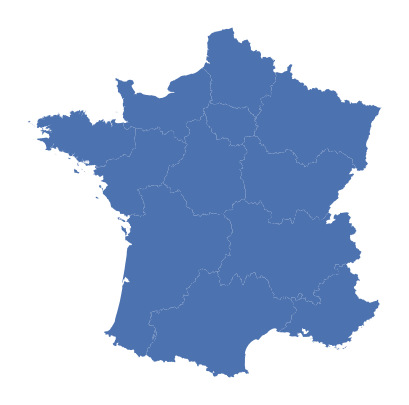

In [92]:
fig, ax = plt.subplots(figsize= (8,5))
france.plot(ax = ax)
ax.set_axis_off()
ax

Complétons la base France avec le nombre de gares par région

In [93]:
NbrGaresRegions = dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False)
NbrGaresRegions = NbrGaresRegions.reset_index()
NbrGaresRegions = NbrGaresRegions.rename(columns={"region.nom" : "NOM", "code_gare" : "Nombre de gares"})
NbrGaresRegions

,NOM,Nombre de gares
0,Île-de-France,406
1,Grand Est,353
2,Hauts-de-France,338
3,Auvergne-Rhône-Alpes,328
4,Nouvelle-Aquitaine,318
5,Occitanie,266
6,Bourgogne-Franche-Comté,198
7,Centre-Val de Loire,159
8,Provence-Alpes-Côte d'Azur,149
9,Pays de la Loire,137


In [94]:
france_merge = france.merge(NbrGaresRegions, how = "left")

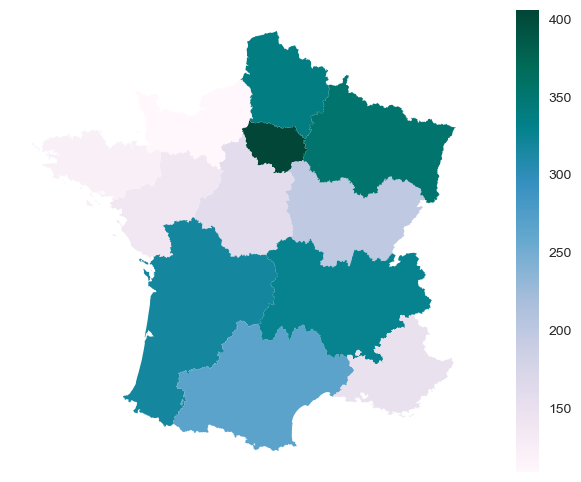

In [95]:
fig, ax = plt.subplots(figsize = (10, 6))
france_merge.plot(ax = ax, column = "Nombre de gares", legend=True, cmap = "PuBuGn")
ax.set_axis_off()

Essayons de rendre plus dynamique ce `choropleth` avec un graphique interractif.

In [96]:
#Importations
import folium
import mapclassify

`A cause de la contrainte de la taille maximale de fichier supporté par github (50Mo), nous choisissons de ne pas afficher le graphique (elle pèse à elle seule plus de 58Mo)`.

`Merci de télécharger le notebook pour visualiser le graphique`

In [97]:
plt.figure(figsize = (6, 3))
choro = france_merge.explore(
     column="Nombre de gares" , # make choropleth based on "Nombre de gares" column
     tooltip="Nombre de gares", # show "Nombre de gares" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="OpenStreetMap", # use "OpenStreetMap" tiles
     cmap="RdPu", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black"), # use black outline
     tooltip_kwds=dict(labels=False) # do not show column label in the tooltip
    )
#choro

<Figure size 600x300 with 0 Axes>

A présent, on affiche sur une carte, la position géographique des stations de chaque région.

Pour cela, il faut d'abord supprimer de la table `dataGresV`, les gares dont la position géographique manque.

In [98]:
dataGaresV[dataGaresV["wgs_84.lon"].isnull()]
dataGaresV2 = dataGaresV.drop(dataGaresV.loc[dataGaresV["wgs_84.lon"].isnull()].index)

In [99]:
dataGaresV2[dataGaresV2["wgs_84.lon"].isnull()]

,code_gare,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,wgs_84.lon,wgs_84.lat,geometry,nom,zone,region.code,region.nom


In [100]:
dataGaresV2[dataGaresV2["region.nom"] == "Grand Est"]["wgs_84.lon"]

430     7.297614
476     7.185290
477     7.085044
478     7.008786
479     7.251681
          ...   
2855    6.386953
2856    6.227920
2857    6.202464
2858    4.706671
2859    4.065281
Name: wgs_84.lon, Length: 352, dtype: float64

Au clic, on obtient le code postale de la ville la longitude et la latitude de la gare.

Il suffit d'entrer le nom d'une région parmi celles proposées. Ici, on représente les gares de la `Normandie`. Chaque gare est symbolisée par un marqueur de position.

`Important : Utiliser le notebook en local pour pouvoir afficher la carte`

In [101]:
reg = input("Entrez une région en choisissant dans la liste : ({})".format(list(dataGaresV2["region.nom"].unique())))
carte = folium.Map(location = [47.094,  2.3942], tiles = "OpenStreetMap", zoom_start = 5.5)
for lon, lat, cp in zip(dataGaresV2[dataGaresV2["region.nom"] == reg]["wgs_84.lon"], dataGaresV2[dataGaresV2["region.nom"] == reg]["wgs_84.lat"], dataGaresV2[dataGaresV2["region.nom"] == reg]["adresse_cp"]) :
    folium.Marker(location = (lat,lon), popup = (cp, lon, lat),   icon=folium.Icon(color="blue", icon="train", prefix="fa")).add_to(carte) #icon fa are from fontawesome icons
carte.add_child(folium.LatLngPopup()) # pour obtenir la latitude et la longitu de chaque point par clic